## 
<h1 style='background-color:#6495ED; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > Breast Cancer  </h1>
cancer that develops from breast tissue. Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, fluid coming from the nipple, a newly inverted nipple, or a red or scaly patch of skin. In those with distant spread of the disease, there may be bone pain, swollen lymph nodes, shortness of breath, or yellow skin.



[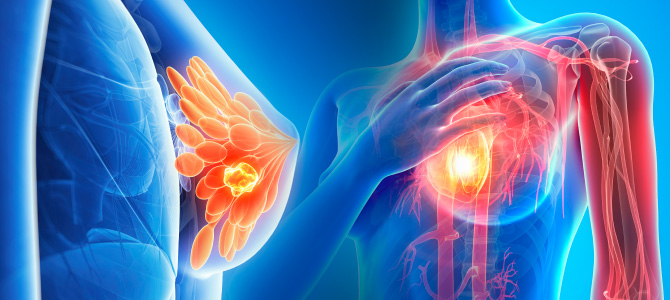](http://)


### 8 Algorithms Classification 

#### We used 8 algorithms Classification
* Linear Regression
* K-Nearest Neighbor
* Support Vector Machine(Linear)
* Support Vector Machine(RBF)
* Gaussian Naive Bayes
* Decision Tree
* Random Forest
* Xgboost

### Data Set Information:

There are 10 predictors, all quantitative, and a binary dependent variable, indicating the presence or absence of breast cancer.

The predictors are anthropometric data and parameters which can be gathered in routine blood analysis.

Prediction models based on these predictors, if accurate, can potentially be used as a biomarker of breast cancer.


### Attribute Information:

Quantitative Attributes:
* Age (years)
* BMI (kg/m2)
* Glucose (mg/dL)
* Insulin (µU/mL)
* HOMA
* Leptin (ng/mL)
* Adiponectin (µg/mL)
* Resistin (ng/mL)
* MCP-1(pg/dL)

### Labels:
* 1=Healthy controls
* 2=Patients


#### Data set :

[Link](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)

In [ ]:
!pip install xlrd

In [ ]:
!pip install autoviz

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import missingno as no
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
df = pd.read_csv("../input/breast-cancer-coimbra-data-set/dataR2.csv")

In [ ]:
#checkrows and columns in the data set
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
print(df.dtypes)

In [ ]:
#Check the miss data
print(f' Ckech the miss data:',df.isna().sum(axis=1))
print(no.bar(df))

In [ ]:
df.info()

In [ ]:
df.quantile()

In [ ]:
df.describe()

### Automatically Visualize 
AutoViz performs automatic visualization of any dataset with one line.

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
target='Classification'
df = AV.AutoViz(filename="",sep=',', depVar=target, dfte=df, header=0, verbose=1, 
                 lowess=False, chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

In [ ]:
import pandas_profiling as pp
profile = pp.ProfileReport(df, title="Breast Cancer Coimbra Disease")
profile

In [ ]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
g = sns.pairplot(df, diag_kind="Classification")
g.map_lower(sns.kdeplot, levels=4, color=".3")

In [ ]:
sns.pairplot(df,vars=['Age'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['BMI'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['Insulin'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['HOMA'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['Leptin'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['Adiponectin'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['Resistin'],hue='Classification',height=5.5)
sns.pairplot(df,vars=['MCP.1'],hue='Classification',height=5.5)

In [ ]:
#Get the correlation of the columns
df.corr()

In [ ]:
df.columns

In [ ]:
# Correlation ecah one feature
df[['Classification','Age']].corr()

In [ ]:
df[['Classification','BMI']].corr()

In [ ]:
df[['Classification','Glucose']].corr()

In [ ]:
df[['Classification','Insulin']].corr()

In [ ]:
df[['Classification','HOMA']].corr()

In [ ]:
df[['Classification','Leptin']].corr()

In [ ]:
df[['Classification','Adiponectin']].corr()

In [ ]:
df[['Classification','Resistin']].corr()

In [ ]:
df[['Classification','MCP.1']].corr()

In [ ]:
df['Classification'].value_counts()

df['Classification'].value_counts() * 100 / len(df)


sns.countplot(x='Classification', data=df, palette='viridis')

In [ ]:
df.columns

In [ ]:
#Select the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 0:9].values 
Y = df.iloc[:,9].values
#OR 
#X=df.drop("Classification", axis=1)
#Y=df["Classification"]
 

In [ ]:
## If anyone to see the data with features (X)
all_columns=['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin','Resistin', 'MCP.1']

X = pd.DataFrame(X,columns=all_columns[0:9])
all_columns[0:9]
X.head()

In [ ]:
Y[:]

In [ ]:
#Split the dataset into 80% Training set and 20% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

In [ ]:
#All the models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state =0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree =DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 10)
  forest.fit(X_train, Y_train)
  



 #Using xgboostr method of ensemble class to use xgboostClassification algorithm
  import xgboost as xgb
  x_gb= xgb.XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42, eval_metric=["auc", "error", "error@0.6"])
  x_gb.fit(X_train, Y_train)


  
    
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  print('[7]xgboost Classifier Training Accuracy:', x_gb.score(X_train, Y_train))
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest ,x_gb

model = models(X_train,Y_train)

In [ ]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np
for i in range(len(model)):
  print('Model ',i)
  #Check Accuracy precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print(F'Accuracy:',accuracy_score(Y_test, model[i].predict(X_test)))
  print(F'Precision:', precision_score(Y_test, model[i].predict(X_test)))
  print(F'Recall:', recall_score(Y_test, model[i].predict(X_test)))
  print(F'F1 Score:', f1_score(Y_test, model[i].predict(X_test)))

  #Check Roc Auc Score
  print( F'Roc Auc Score:',roc_auc_score(Y_test, model[i].predict(X_test)) )
  print( F'Balanced Accuracy Score:',balanced_accuracy_score(Y_test, model[i].predict(X_test)) ) 
  print( F'Confusion Matrix:',confusion_matrix(Y_test, model[i].predict(X_test)) )
  print()#Print a new line

In [ ]:
for i in range(len(model)):
  print('Model ',i)
# ROC CURVE
  plot_roc_curve(model[i], X_test, Y_test)
  plt.title('ROC Curve')
  plt.plot([0, 1], [0, 1], 'r--')
  plt.show()

In [ ]:
#Print Prediction of Random Forest Classifier model
pred = model[1].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)

In [ ]:
#Accuracy Score
acc_1 = 0.62 
acc_2 = 0.79
acc_3 = 0.54
acc_4 = 0.70
acc_5 = 0.54
acc_6 = 0.67
acc_7 = 0.67
acc_8 = 0.75


results = pd.DataFrame([["Logistic Regression",acc_1],["K-Nearest Neighbor",acc_2],[" SVM(Linear)",acc_3],
                       ["SVM(RBF)",acc_4],["Gaussian Naive Bayes",acc_5],
                       ["Decision Tree",acc_6],["Random Forest",acc_7],["Xgboost",acc_8]],
                        columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)


results.style.background_gradient(cmap='Blues')

In [ ]:
# Precision Score
Pre_1 = 0.62 
Pre_2 = 0.80
Pre_3 = 0.57
Pre_4 = 0.68
Pre_5 = 0.60
Pre_6 = 0.69
Pre_7 = 0.72
Pre_8 = 0.76


results = pd.DataFrame([["Logistic Regression",Pre_1],["K-Nearest Neighbor",Pre_2],[" SVM(Linear)",Pre_3],
                       ["SVM(RBF)",Pre_4],["Gaussian Naive Bayes",Pre_5],
                       ["Decision Tree",Pre_6],["Random Forest",Pre_7],["Xgboost",Pre_8]],
                        columns = ["Models","Precision Score"]).sort_values(by='Precision Score',ascending=False)


results.style.background_gradient(cmap='Blues')

In [ ]:
# Recall Score
Rec_1 = 0.45 
Rec_2 = 0.76
Rec_3 = 0.61
Rec_4 = 0.71
Rec_5 = 0.46
Rec_6 = 0.69
Rec_7 = 0.61 
Rec_8 = 0.72

results = pd.DataFrame([["Logistic Regression",Rec_1],["K-Nearest Neighbor",Rec_2],[" SVM(Linear)",Rec_3],
                       ["SVM(RBF)",Rec_4],["Gaussian Naive Bayes",Rec_5],
                       ["Decision Tree",Rec_6],["Random Forest",Rec_7],["Xgboost",Rec_8]],
                        columns = ["Models","Recall Score"]).sort_values(by='Recall Score',ascending=False)


results.style.background_gradient(cmap='Blues')



<h1 style='background-color:; font-family:newtimeroman; font-size:180%; text-align:center; border-radius: 15px 50px;' > The best score K-Nearest Neighbor </h1>

<img src="https://it4agri.com/wp-content/uploads/2021/04/breast-cancer-prediction.png" width="500px">

<h1 style='background-color:; font-family:newtimeroman; font-size:110%; text-align:center; border-radius: 15px 50px;' >  Accuracy : 0.7916666666666666 </h1>
<h1 style='background-color:; font-family:newtimeroman; font-size:110%; text-align:center; border-radius: 15px 50px;' >  Precision : 0.800000000000000 </h1>
<h1 style='background-color:; font-family:newtimeroman; font-size:110%; text-align:center; border-radius: 15px 50px;' >  Recall : 0.7272727272727273 </h1>
<h1 style='background-color:; font-family:newtimeroman; font-size:110%; text-align:center; border-radius: 15px 50px;' >  F1-Score : 0.761904761904762 </h1>
<h1 style='background-color:; font-family:newtimeroman; font-size:110%; text-align:center; border-radius: 15px 50px;' >  Roc Auc Score : 0.7867132867132868 </h1>
<h1 style='background-color:; font-family:newtimeroman; font-size:110%; text-align:center; border-radius: 15px 50px;' >  Balanced Accuracy Score : 0.7867132867132867 </h1>










![Upvote!](https://img.shields.io/badge/Upvote-If%20you%20like%20my%20work-07b3c8?style=for-the-badge&logo=kaggle)

# Good Luck